In [1]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
import numpy as np
import pandas as pd
from tensorflow import random
from sklearn.model_selection import train_test_split
# import required packages for plotting
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline 
import matplotlib.patches as mpatches

Using TensorFlow backend.


In [2]:
feats= pd.read_csv('outlier_feats.csv')
target=pd.read_csv('outlier_target.csv')

In [3]:
feats

,feature1,feature2
0,0.541336,-0.074795
1,0.626001,-0.572346
2,-0.030819,-0.716368
3,-0.147079,-0.478156
4,-0.771144,0.431074
...,...,...
3354,0.599094,-0.168325
3355,0.364545,0.064491
3356,-0.424160,-0.162835
3357,0.212499,-0.389776


In [4]:
target['Class'].value_counts()

1    3000
0     359
Name: Class, dtype: int64

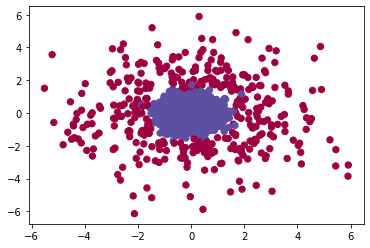

In [5]:
plt.scatter(feats['feature1'], feats['feature2'], s=40, c=target['Class'], cmap=plt.cm.Spectral)

In [7]:
relu_model= Sequential()
relu_model.add(Dense(units=3,activation='relu',input_dim=feats.shape[1]))
relu_model.add(Dense(units=1,activation='sigmoid'))
relu_model.compile(optimizer='sgd', loss='binary_crossentropy')
print(relu_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
history = relu_model.fit(feats,target['Class'],validation_split=0.2,batch_size=5,epochs=100,verbose=1,shuffle=False)

Instructions for updating:
Use tf.cast instead.
Train on 2687 samples, validate on 672 samples
Epoch 1/100
2687/2687 [==============================] - 1s 258us/step - loss: 0.4769 - val_loss: 0.3793
Epoch 2/100
2687/2687 [==============================] - 1s 211us/step - loss: 0.3361 - val_loss: 0.3219
Epoch 3/100
2687/2687 [==============================] - 1s 227us/step - loss: 0.2907 - val_loss: 0.2898
Epoch 4/100
2687/2687 [==============================] - 1s 217us/step - loss: 0.2596 - val_loss: 0.2645
Epoch 5/100
2687/2687 [==============================] - 1s 214us/step - loss: 0.2342 - val_loss: 0.2433
Epoch 6/100
2687/2687 [==============================] - 1s 214us/step - loss: 0.2135 - val_loss: 0.2251
Epoch 7/100
2687/2687 [==============================] - 1s 218us/step - loss: 0.1967 - val_loss: 0.2096
Epoch 8/100
2687/2687 [==============================] - 1s 207us/step - loss: 0.1830 - val_loss: 0.1973
Epoch 9/100
2687/2687 [==============================] - 1s 205us

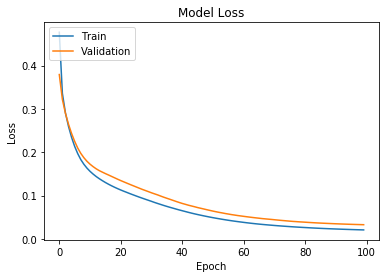

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

In [12]:
def plot_decision_boundary(pred_func, X, Y): 
    # create a mesh of possible values for X1 and X2
    x1_min, x1_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5 
    x2_min, x2_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5 
    h = 0.01 
    X1, X2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    # predict output for all the values in the mesh
    Y_hat = pred_func(np.c_[X1.ravel(), X2.ravel()]) 
    Y_hat = Y_hat.reshape(X1.shape) 
    Y_hat = Y_hat.round(decimals=0)
    # plot predicted values
    plt.contourf(X1, X2, Y_hat, cmap=plt.cm.Spectral) 
    # plot points in the training dataset
    class_1=plt.scatter(X.loc[Y['Class']==0,'feature1'], X.loc[Y['Class']==0,'feature2'], c="red", s=40, edgecolor='k')
    class_2=plt.scatter(X.loc[Y['Class']==1,'feature1'], X.loc[Y['Class']==1,'feature2'], c="blue", s=40, edgecolor='k')
    # add legend 
    plt.legend((class_1, class_2, mpatches.Patch(color="red"), mpatches.Patch(color="blue")),('Fail','Pass',"Fail Class predicted region", "Pass Class predicted region")) 
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

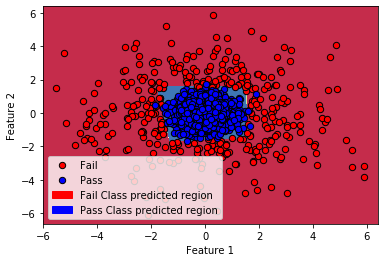

In [13]:
plot_decision_boundary(lambda x: relu_model.predict(x), feats, target)

In [14]:
tanh_model= Sequential()
tanh_model.add(Dense(units=3,activation='tanh',input_dim=feats.shape[1]))
tanh_model.add(Dense(units=1,activation='sigmoid'))
tanh_model.compile(optimizer='sgd',loss='binary_crossentropy')
print(tanh_model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
history = tanh_model.fit(feats,target['Class'],validation_split=0.2,batch_size =5,epochs=100,shuffle=False,verbose=1)

Train on 2687 samples, validate on 672 samples
Epoch 1/100
2687/2687 [==============================] - 1s 265us/step - loss: 0.3922 - val_loss: 0.2932
Epoch 2/100
2687/2687 [==============================] - 1s 209us/step - loss: 0.2708 - val_loss: 0.2690
Epoch 3/100
2687/2687 [==============================] - 1s 207us/step - loss: 0.2525 - val_loss: 0.2571
Epoch 4/100
2687/2687 [==============================] - 1s 212us/step - loss: 0.2408 - val_loss: 0.2474
Epoch 5/100
2687/2687 [==============================] - 1s 213us/step - loss: 0.2308 - val_loss: 0.2387
Epoch 6/100
2687/2687 [==============================] - 1s 227us/step - loss: 0.2216 - val_loss: 0.2309
Epoch 7/100
2687/2687 [==============================] - 1s 233us/step - loss: 0.2130 - val_loss: 0.2237
Epoch 8/100
2687/2687 [==============================] - 1s 229us/step - loss: 0.2049 - val_loss: 0.2170
Epoch 9/100
2687/2687 [==============================] - 1s 215us/step - loss: 0.1973 - val_loss: 0.2107
Epoch 10

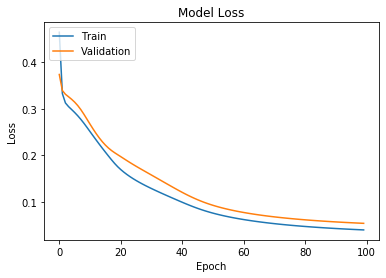

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

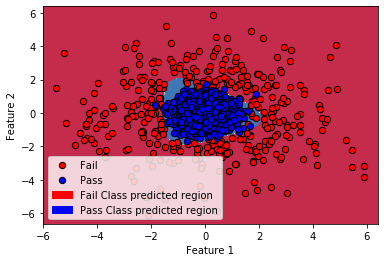

In [16]:
plot_decision_boundary(lambda x: tanh_model.predict(x), feats, target)